<a href="https://colab.research.google.com/github/Maniacravi/pytorch-deep-learning/blob/main/01_pytorch_workflow_mani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow fundamentals

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check version
torch.__version__

'2.6.0+cu124'

## Data preparing and loading

![ML Data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)


In [3]:
# Use linear regression to make a straight line

# Create known params
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

Text(0, 0.5, 'y')

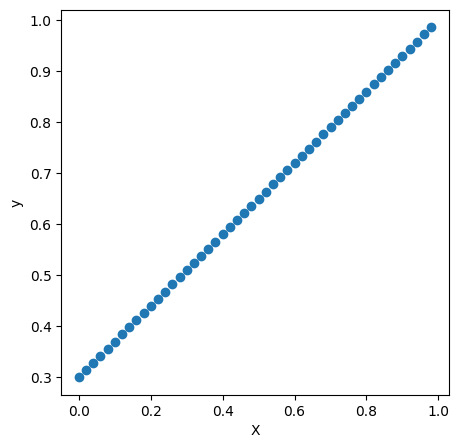

In [5]:
# Visualize our data

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, y)
ax.set_xlabel("X")
ax.set_ylabel("y")

In [6]:
# Splitting into training and test set

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
# create a function to plot origina data and predictions

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  '''
  Plots training data, test data and compares predictions
  '''

  plt.figure(figsize=(14, 6))

  # Plt training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()
  plt.show()



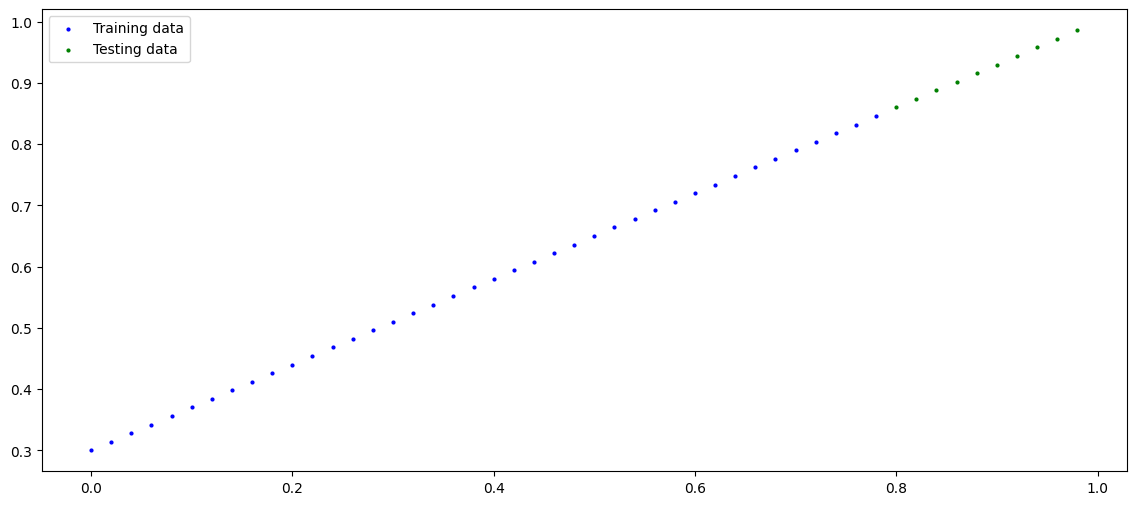

In [8]:
plot_predictions()

## Build model

In [9]:
class LinearRegressionModel(nn.Module): # almost eveerything in PyTorch is a nn.Module

  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # This is the linear regression model



![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)

### PyTorch model building essentials


| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

In [10]:
# Checking the contents of our model

# create a random seed
torch.manual_seed(42)

# Create an instance of the module
model_0 = LinearRegressionModel()

model_0.parameters()

<generator object Module.parameters at 0x78472bf72420>

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Make predictions as is with the model without training

In [13]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

You probably noticed we used torch.inference_mode() as a context manager (that's what the with torch.inference_mode(): is) to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

> **Note:** In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things,
`torch.inference_mode()` is newer, potentially faster and preferred. See this [Tweet from PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) for more.

We've made some predictions, let's see what they look like.

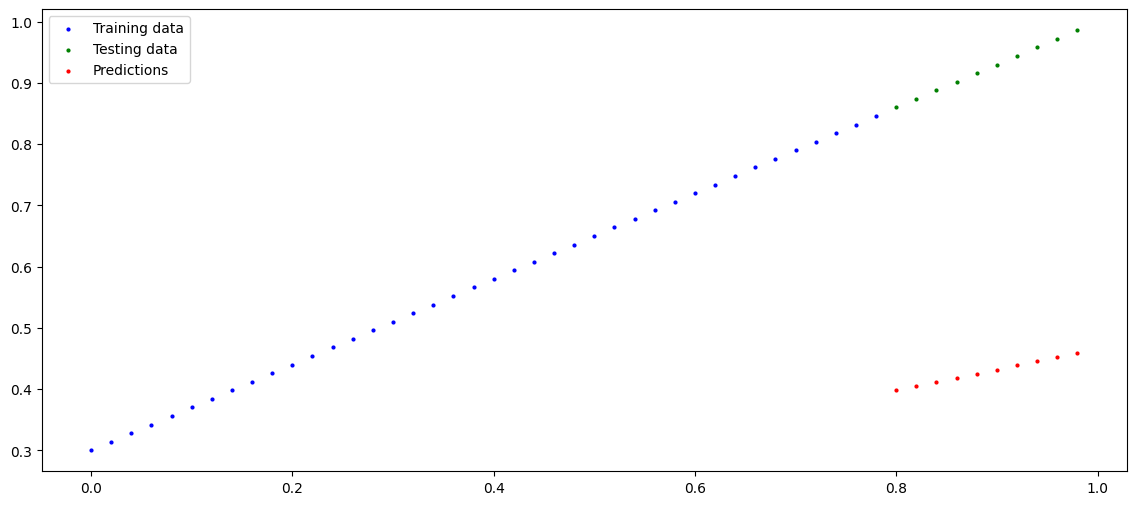

In [14]:
plot_predictions(predictions=y_preds)

In [15]:
(y_test - y_preds).mean() # Mean error

tensor(0.4945)

## Train model

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Let's create a loss function and an optimizer we can use to help improve our model.

In [16]:
# We need to create a loss function
loss_fn = nn.L1Loss() # Mean absolute error is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # Stochastic Gradient Descent
                           lr=0.01) # Learning Rate

### Building a training loop



### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.

In [17]:
# Pass the data through a function in epochs
epochs = 200

# create empty loss lists to track values
train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):

  # Put model in training mode
  model_0.train()

  # Forward prop
  y_pred = model_0(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  # zero the gradients
  optimizer.zero_grad()

  # Backprop
  loss.backward()

  # Step the optimizer
  optimizer.step()

  # Test data
  model_0.eval() # Turn on eval mode - turns off things not needed in testing mode

  with torch.inference_mode(): # turns off gradient tracking
    # Forward prop on test data
    test_pred = model_0(X_test)

    # Calculate loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

  # Print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_losses.append(loss.detach().numpy())
    test_losses.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Train Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Train Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Train Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Train Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Train Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Train Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Train Loss: 0.01758546568453312 | Test Loss: 0.040604822337627

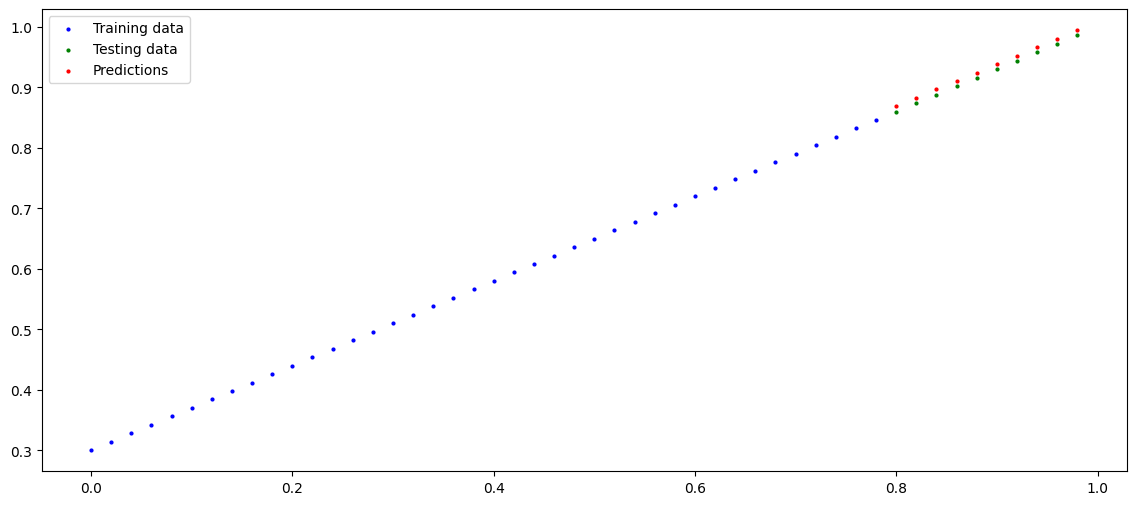

In [21]:
with torch.inference_mode():
    # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

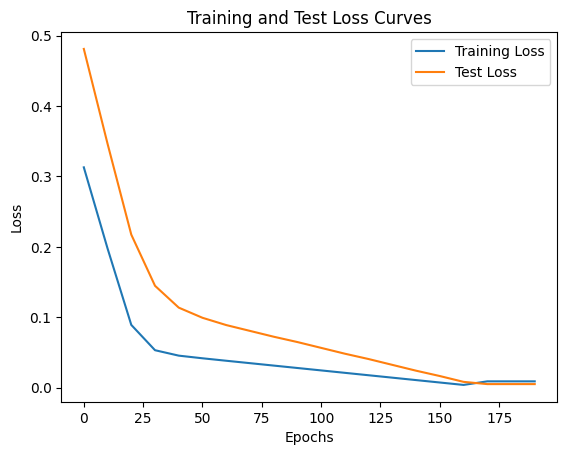

In [19]:
# Plot the loss curves

plt.plot(epoch_count, train_losses, label='Training Loss')
plt.plot(epoch_count, test_losses, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

As we can see, pretty pretty close to actual weight and bias!

## Saving and Loading a Model

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.

In [24]:
# Saving our model
from pathlib import Path

# Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # Because MODEL_PATH is a pathlib Path object, this syntax works

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [25]:
# Loading our saved model

loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
# Let's do inference with the model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

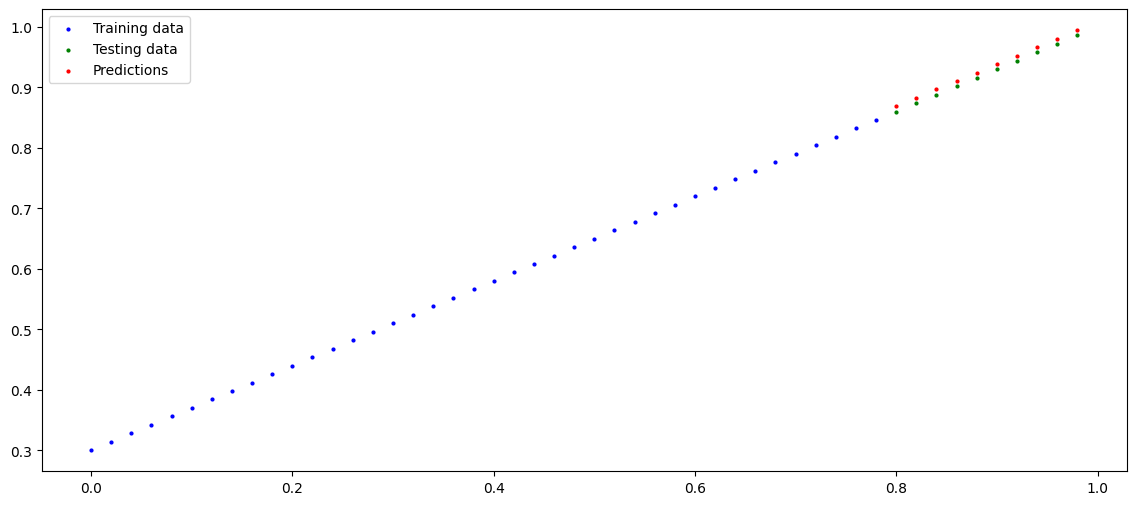

In [27]:
plot_predictions(predictions=loaded_model_preds)

In [28]:
loaded_model_preds == y_preds # Same as our previous predictions before we saved the model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Nice!

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> **Note:** There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more.

## Putting everything together

Now let's put everything together

In [19]:
# import statements

import torch
import torch.nn as nn
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
# check PyTorch version
torch.__version__

'2.6.0+cu124'

In [20]:
# Device agnostic code

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

device

'cpu'

### Data

In [21]:
# Create dataset

weight = 0.3
bias = 0.9

# range values
start = 0
stop = 10
step = 0.02

X = torch.arange(start, stop, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias


In [22]:
# Split the dataset into training and testing

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [23]:
# Create a function to plot training, testing and preds

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  '''
  Plots training data, test data and compares predictions
  '''

  plt.figure(figsize=(14, 6))
  plt.scatter(train_data, train_labels, c="b", s=2, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=2, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()
  plt.show()

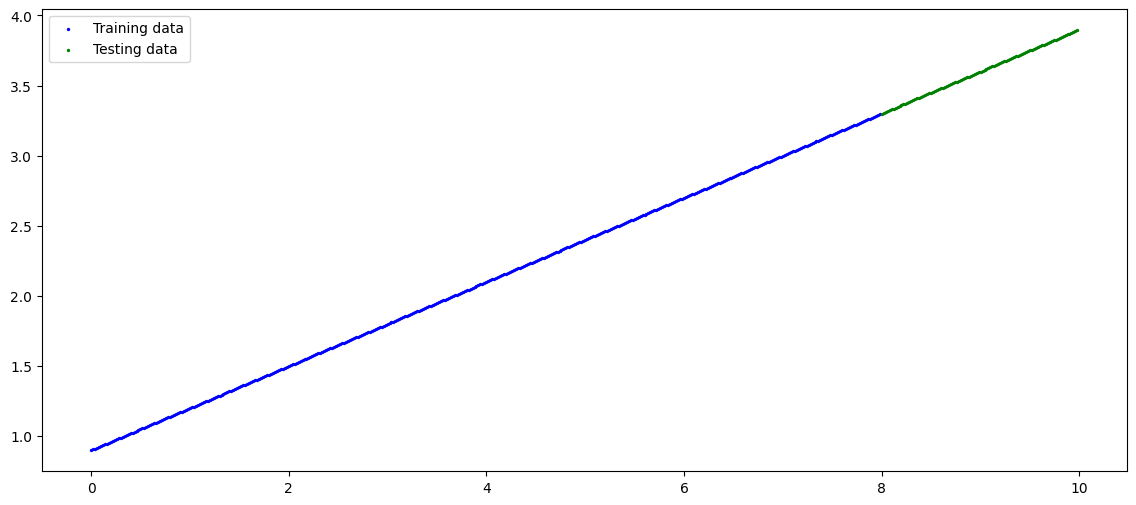

In [24]:
plot_predictions()

### Building a model

In [25]:
# subclass nn.Module

class LinearRegressionModel(nn.Module):

  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # Parameters
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias

In [26]:
# Instantiate the model cand check state

model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))])

#### Different way to build the model - nn.Linear

In [27]:
class LinearRegresseionModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    # Use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # Define forward prop
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

# Set manual seed
torch.manual_seed(42)

# Create an instance of the model
model_2 = LinearRegresseionModelV2()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Loss function and optimizer

In [28]:
# Create a loss function and optimizer

loss = nn.L1Loss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

### Training and Testing loop

In [29]:
# Create a training loop

epochs = 300

# Create empty lists to store losses
epoch_list = []
training_loss = []
testing_loss = []

for epoch in range(epochs):
  # Put the model in train mode
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  # Calculate loss
  train_loss = loss(y_pred, y_train)

  # Zero the gradients
  optimizer_1.zero_grad()

  # Backprop
  train_loss.backward()

  # Step the optimizer
  optimizer_1.step()

  # Put the model in eval mode
  model_1.eval()

  with torch.inference_mode():
    # Forward pass
    test_pred = model_1(X_test)

    # Calculate loss
    test_loss = loss(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_list.append(epoch)
    training_loss.append(train_loss.detach().numpy())
    testing_loss.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.3481232523918152 | Test Loss: 0.6863119602203369
Epoch: 10 | Train Loss: 0.27858641743659973 | Test Loss: 0.4041023552417755
Epoch: 20 | Train Loss: 0.26189491152763367 | Test Loss: 0.37885525822639465
Epoch: 30 | Train Loss: 0.24520504474639893 | Test Loss: 0.3561754524707794
Epoch: 40 | Train Loss: 0.2285154163837433 | Test Loss: 0.33092835545539856
Epoch: 50 | Train Loss: 0.21182389557361603 | Test Loss: 0.3056812584400177
Epoch: 60 | Train Loss: 0.19513444602489471 | Test Loss: 0.28300145268440247
Epoch: 70 | Train Loss: 0.17844438552856445 | Test Loss: 0.25775426626205444
Epoch: 80 | Train Loss: 0.161752849817276 | Test Loss: 0.23250718414783478
Epoch: 90 | Train Loss: 0.14506381750106812 | Test Loss: 0.20982764661312103
Epoch: 100 | Train Loss: 0.12837326526641846 | Test Loss: 0.18458057940006256
Epoch: 110 | Train Loss: 0.11168177425861359 | Test Loss: 0.16190098226070404
Epoch: 120 | Train Loss: 0.09499304741621017 | Test Loss: 0.13665395975112915
Epoch

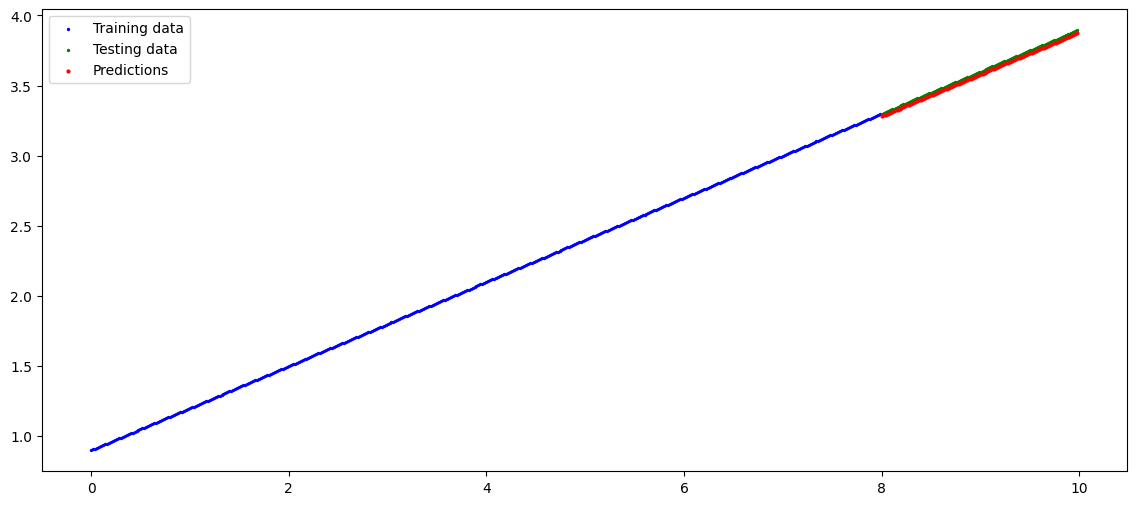

In [30]:
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

In [33]:
# What about for the nn.Linear model

epochs = 300

# Create empty lists to store losses
epoch_list = []
training_loss = []
testing_loss = []

for epoch in range(epochs):
  # Put the model in train mode
  model_2.train()

  # Forward pass
  y_pred = model_2(X_train)

  # Calculate loss
  train_loss = loss(y_pred, y_train)

  # Zero the gradients
  optimizer_2.zero_grad()

  # Backprop
  train_loss.backward()

  # Step the optimizer
  optimizer_2.step()

  # Put the model in eval mode
  model_2.eval()

  with torch.inference_mode():
    # Forward pass
    test_pred = model_2(X_test)

    # Calculate loss
    test_loss = loss(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_list.append(epoch)
    training_loss.append(train_loss.detach().numpy())
    testing_loss.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 10 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 20 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 30 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 40 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 50 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 60 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 70 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 80 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 90 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 100 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 110 | Train Loss: 0.03430567681789398 | Test Loss: 0.30392780900001526
Epoch: 120 | Train Loss: 0.03430567681789398 | Test Loss: 0.303927809000015

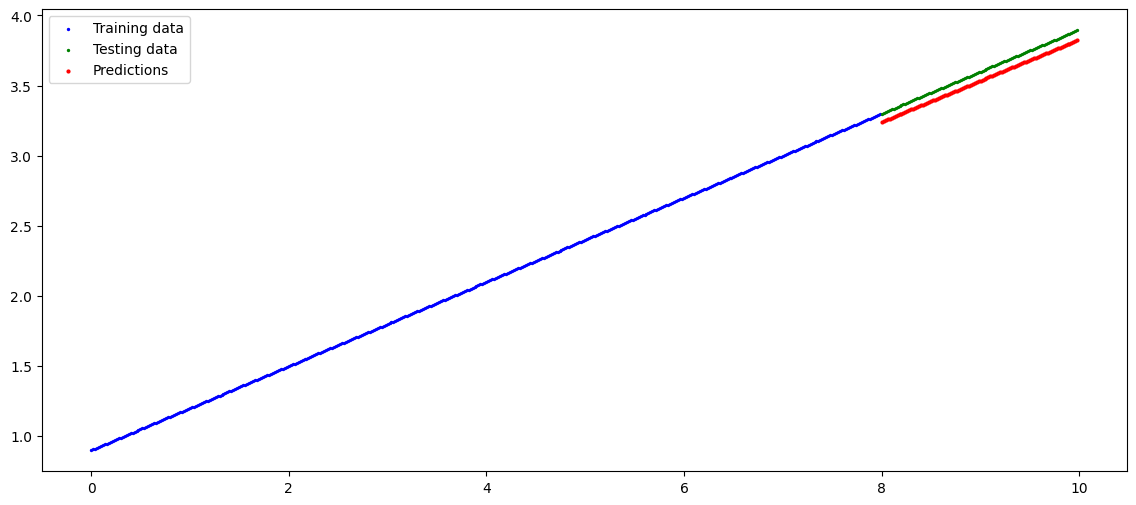

In [34]:
with torch.inference_mode():
  y_preds = model_2(X_test)

plot_predictions(predictions=y_preds)

In [37]:
### Save and load the models

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create save path
MODEL_NAME = '01_pytorch_workflow_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_2.pth


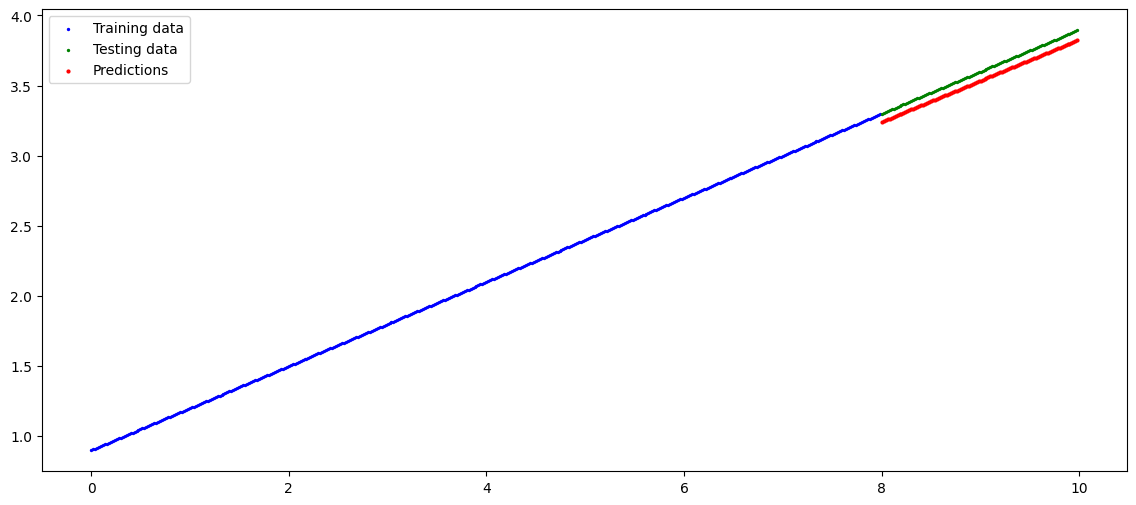

In [38]:
# Load and evluate the model

loaded_model = LinearRegresseionModelV2()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

plot_predictions(predictions=loaded_model_preds)

In [39]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

Everything's the same! Noice!!